# Sentiment Analysis for Financial Data
## Predicting decrease or increase in stock's price based on tweets sentiment analysis

##### In this project we're going to train sentiment analysis models - in order to analyse the sentiment of financial data (tweets).
##### Social media, news and professional opinion (financial analyst opinions) tend to inflect greatly on stocks prices, it's enogh for Elon Musk to tweet : "Twitter deal temporarily on hold", for the stock of Twitter to drop by 18%.
##### While there are many pre-trained sentiment analysis models, and much data along the interent to train your own sentiment analysis model - the main goal of our research is to train dedicated sentiment analysis model to deal with financial data.
##### The agenda is that a dedicated model, adjusted to the specific type of data you want to work with, even if it's small - will deal better with the task, than a more large but generic model.
##### In this project we will train dedicated sentiment analysis model for financial data. I'll compare it's performance with models trained on generic data, make predictions and evaluate them, and finally make conclusions.

# Research Question

### "Can sentiment analysis of financial text data provide insight and predict increase or decrease of stock's price?"   

# About the Data

## Training Data
#### 1.	Stock Market Tweet | Sentiment Analysis lexicon
https://www.kaggle.com/datasets/utkarshxy/stock-markettweets-lexicon-data
##### Tweets were collectect between April 9 and July 16, 2020 using SPX500 and the top 25 companies in the index and "#stocks". 1300 tweets were manually classified and reviewed. contains the following columns:
##### - ID -> Contains id used for the tweet.
##### - Date and time -> Date and time when the tweet was tweeted.
##### - Tweet -> Tweet/text written by the user.
##### - Sentiment -> Wheter the tweet was postive, neutral or negative.

#### 2.	Stock-Market Sentiment Dataset
https://www.kaggle.com/datasets/yash612/stockmarket-sentiment-dataset
##### a dataset created by YASH CHAUDHARY, and shared on Kaggle.
##### Data description: manually labeled tweets of financial data. There is no date regarding the tweets - last update was in 2020 - 3 years ago. contains around 5.7K labeled tweets (2.1K negative and 3.6K positive). contains the following columns:
##### - Text -> Tweet text
##### - Sentiment -> positive (1) negative (-1) 

#### 3.	FinancialPhraseBank
https://metatext.io/datasets/financialphrasebank
##### a dataset created by Malo et al. in 2014. and shared by ANKUR SINHA in Kaggle.
##### Data description: FinancialPhraseBank data, contains the sentiments for financial news headlines from the perspective of a retail investor. contains around 4.8K sentences. contains the following columns:
##### - News Headline -> News Headline.
##### - Sentiment -> Wheter the tweet was positive, neutral or negative.
 
#### 4.	Stock News Sentiment Analysis
https://www.kaggle.com/datasets/avisheksood/stock-news-sentiment-analysismassive-dataset
##### a dataset created by AVISHEK AVISHEK, and shared on Kaggle. mannualy created by the author, covers chosen sentences from news from february 2003 till august 2022.
##### contains arond 108K sentences and labels, unfortunatelly after manual review of the data only the first 8.2K rows were found usefull. contains the following columns:
##### - Sentence -> sentence from news.
##### - Sentiment -> positive (1) neutral or negative (0).

#### 5. Auditor sentiment dataset 
https://huggingface.co/datasets/FinanceInc/auditor_sentiment/blob/main/README.md
##### Data description: Auditor sentiment dataset of sentences from financial news. The dataset consists of several thousand sentences from English language financial news categorized by sentiment. split into train and test data, will be used as trained data only - total of 4840 sentences. contains the following columns:
##### - sentence: a tokenized line from the dataset
##### - label: a label corresponding to the class as a string: 'positive' - (2), 'neutral' - (1), or 'negative' - (0)

Total Training data ~ 25K short text (7K tweets, 4.8K News Headlines, 13K news sentences)

## Test Data - Unlabeled
#### 1.	Stock Tweets for Sentiment Analysis and Prediction
https://www.kaggle.com/datasets/equinxx/stock-tweets-for-sentiment-analysis-and-prediction
##### A dataset created by HANNA YUKHYMENKO, and shared on Kaggle.
##### Data description: The dataset contains about 80K tweets for top 25 most watched stock tickers on Yahoo Finance from 30-09-2021 to 30-09-2022. contains the  following collumns:
##### •	Date - date and time of tweet
##### •	Tweet - full text of the tweet
##### •	Stock Name - full stock ticker name for which the tweet was scraped
##### •	Company Name - full company name for corresponding tweet and stock ticker

This data is unlabeled, so the evaluation of the predictions will be according to the real stock's prices on Yahoo finance.

Total test data ~ 80K tweets

# Data Preparation 

In this section I will combine the 5 trainning datasets to 1, with 3 labels (positive 1, neutral 0, negative -1).

###  Dataset 1: Stock_Market_Tweet_ Sentiment_Analysis_lexicon

In [348]:
path1 ="D:/MachineLearning/Financial_Datasets/2_Stock_Market_Tweet_ Sentiment_Analysis_lexicon.csv"

In [349]:
import pandas as pd

In [350]:
df1 = pd.read_csv(path1, sep=';')
df1

id                 created_at  \
0      77522  2020-04-15 01:03:46+00:00   
1     661634  2020-06-25 06:20:06+00:00   
2     413231  2020-06-04 15:41:45+00:00   
3     760262  2020-07-03 19:39:35+00:00   
4     830153  2020-07-09 14:39:14+00:00   
...      ...                        ...   
4995  411380  2020-06-04 18:14:57+00:00   
4996   62318  2020-04-14 02:15:01+00:00   
4997  627230  2020-06-23 14:08:15+00:00   
4998  890123  2020-07-14 23:18:34+00:00   
4999  301411  2020-05-06 04:22:19+00:00   

                                                   text sentiment  
0     RT @RobertBeadles: Yo💥\nEnter to WIN 1,000 Mon...  positive  
1     #SriLanka surcharge on fuel removed!\n⛽📉\nThe ...  negative  
2     Net issuance increases to fund fiscal programs...  positive  
3     RT @bentboolean: How much of Amazon's traffic ...  positive  
4     $AMD Ryzen 4000 desktop CPUs looking ‘great’ a...  positive  
...                                                 ...       ...  
4995  With ad revenues falling, what’s the impact on...       NaN  
4996  RT @KelvinSCWong: Well another point to add to...       NaN  
4997  $ITOX working on a contract with a fortune 500...       NaN  
4998  $DIS it could break the 120 pin, then 125&gt; ...       NaN  
4999  Amedisys Inc $AMED COO Christopher Gerard Sell...       NaN  

[5000 rows x 4 columns]

In [351]:
df1 = df1.drop('id', axis=1)
df1 = df1.drop('created_at', axis=1)
df1

text sentiment
0     RT @RobertBeadles: Yo💥\nEnter to WIN 1,000 Mon...  positive
1     #SriLanka surcharge on fuel removed!\n⛽📉\nThe ...  negative
2     Net issuance increases to fund fiscal programs...  positive
3     RT @bentboolean: How much of Amazon's traffic ...  positive
4     $AMD Ryzen 4000 desktop CPUs looking ‘great’ a...  positive
...                                                 ...       ...
4995  With ad revenues falling, what’s the impact on...       NaN
4996  RT @KelvinSCWong: Well another point to add to...       NaN
4997  $ITOX working on a contract with a fortune 500...       NaN
4998  $DIS it could break the 120 pin, then 125&gt; ...       NaN
4999  Amedisys Inc $AMED COO Christopher Gerard Sell...       NaN

[5000 rows x 2 columns]

In [352]:
df1['sentiment'] = df1['sentiment'].replace('positive', 1)
df1['sentiment'] = df1['sentiment'].replace('neutral', 0)
df1['sentiment'] = df1['sentiment'].replace('negative', -1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   text       5000 non-null   object 
 1   sentiment  1300 non-null   float64
dtypes: float64(1), object(1)
memory usage: 78.2+ KB


In [353]:
df1 = df1.dropna()
df1

text  sentiment
0     RT @RobertBeadles: Yo💥\nEnter to WIN 1,000 Mon...        1.0
1     #SriLanka surcharge on fuel removed!\n⛽📉\nThe ...       -1.0
2     Net issuance increases to fund fiscal programs...        1.0
3     RT @bentboolean: How much of Amazon's traffic ...        1.0
4     $AMD Ryzen 4000 desktop CPUs looking ‘great’ a...        1.0
...                                                 ...        ...
1295  #stocks back from the recovery room: https://t...        1.0
1296  RT @MacroCharts: Breadth – expanding last week...        1.0
1297  RT @MawsonResource: Rompas-Rajapalot: A Big Ne...        0.0
1298  $AAPL $QQQ Top may now be in. https://t.co/iNK...        1.0
1299  GLG Partners LP short position in HILTON FOOD ...       -1.0

[1300 rows x 2 columns]

In [354]:
df1 = df1.rename(columns={'text':'Text'})
df1 = df1.rename(columns={'sentiment':'Sentiment'})
df1

Text  Sentiment
0     RT @RobertBeadles: Yo💥\nEnter to WIN 1,000 Mon...        1.0
1     #SriLanka surcharge on fuel removed!\n⛽📉\nThe ...       -1.0
2     Net issuance increases to fund fiscal programs...        1.0
3     RT @bentboolean: How much of Amazon's traffic ...        1.0
4     $AMD Ryzen 4000 desktop CPUs looking ‘great’ a...        1.0
...                                                 ...        ...
1295  #stocks back from the recovery room: https://t...        1.0
1296  RT @MacroCharts: Breadth – expanding last week...        1.0
1297  RT @MawsonResource: Rompas-Rajapalot: A Big Ne...        0.0
1298  $AAPL $QQQ Top may now be in. https://t.co/iNK...        1.0
1299  GLG Partners LP short position in HILTON FOOD ...       -1.0

[1300 rows x 2 columns]

###  Dataset 2: Stock_Market_Sentiment_Dataset

In [355]:
path2 = "D:/MachineLearning/Financial_Datasets/3_Stock_Market_Sentiment_Dataset.csv"

In [356]:
df2 = pd.read_csv(path2)
df2

Text  Sentiment
0     Kickers on my watchlist XIDE TIT SOQ PNK CPW B...          1
1     user: AAP MOVIE. 55% return for the FEA/GEED i...          1
2     user I'd be afraid to short AMZN - they are lo...          1
3                                     MNTA Over 12.00            1
4                                      OI  Over 21.37            1
...                                                 ...        ...
5786  Industry body CII said #discoms are likely to ...         -1
5787  #Gold prices slip below Rs 46,000 as #investor...         -1
5788  Workers at Bajaj Auto have agreed to a 10% wag...          1
5789  #Sharemarket LIVE: Sensex off day’s high, up 6...          1
5790  #Sensex, #Nifty climb off day's highs, still u...          1

[5791 rows x 2 columns]

###  Dataset 3: Sentiment_Analysis_for_Financial_News

In [357]:
path3 = "D:/MachineLearning/Financial_Datasets/4_Sentiment_Analysis_for_Financial_News.csv"

In [358]:
import chardet

# Open the file in binary mode and detect the encoding
with open('D:/MachineLearning/Financial_Datasets/4_Sentiment_Analysis_for_Financial_News.csv', 'rb') as f:
    result = chardet.detect(f.read())

# Read the file with the detected encoding
df3 = pd.read_csv('D:/MachineLearning/Financial_Datasets/4_Sentiment_Analysis_for_Financial_News.csv', encoding=result['encoding'], header=None)
df3.columns = ['Sentiment','News_header']

In [359]:
df3

Sentiment                                        News_header
0      neutral  According to Gran , the company has no plans t...
1      neutral  Technopolis plans to develop in stages an area...
2     negative  The international electronic industry company ...
3     positive  With the new production plant the company woul...
4     positive  According to the company 's updated strategy f...
...        ...                                                ...
4841  negative  LONDON MarketWatch -- Share prices ended lower...
4842   neutral  Rinkuskiai 's beer sales fell by 6.5 per cent ...
4843  negative  Operating profit fell to EUR 35.4 mn from EUR ...
4844  negative  Net sales of the Paper segment decreased to EU...
4845  negative  Sales in Finland decreased by 10.5 % in Januar...

[4846 rows x 2 columns]

In [360]:
df3['sentiment'] = df3['Sentiment']
df3 = df3.drop('Sentiment', axis=1)
df3 = df3.rename(columns={'News_header':'Text'})
df3 = df3.rename(columns={'sentiment':'Sentiment'})
df3

Text Sentiment
0     According to Gran , the company has no plans t...   neutral
1     Technopolis plans to develop in stages an area...   neutral
2     The international electronic industry company ...  negative
3     With the new production plant the company woul...  positive
4     According to the company 's updated strategy f...  positive
...                                                 ...       ...
4841  LONDON MarketWatch -- Share prices ended lower...  negative
4842  Rinkuskiai 's beer sales fell by 6.5 per cent ...   neutral
4843  Operating profit fell to EUR 35.4 mn from EUR ...  negative
4844  Net sales of the Paper segment decreased to EU...  negative
4845  Sales in Finland decreased by 10.5 % in Januar...  negative

[4846 rows x 2 columns]

In [361]:
df3['Sentiment'] = df3['Sentiment'].replace('positive', 1)
df3['Sentiment'] = df3['Sentiment'].replace('neutral', 0)
df3['Sentiment'] = df3['Sentiment'].replace('negative', -1)
df3

Text  Sentiment
0     According to Gran , the company has no plans t...          0
1     Technopolis plans to develop in stages an area...          0
2     The international electronic industry company ...         -1
3     With the new production plant the company woul...          1
4     According to the company 's updated strategy f...          1
...                                                 ...        ...
4841  LONDON MarketWatch -- Share prices ended lower...         -1
4842  Rinkuskiai 's beer sales fell by 6.5 per cent ...          0
4843  Operating profit fell to EUR 35.4 mn from EUR ...         -1
4844  Net sales of the Paper segment decreased to EU...         -1
4845  Sales in Finland decreased by 10.5 % in Januar...         -1

[4846 rows x 2 columns]

###  Dataset 4: Stock_News_Sentiment_Analysis

In [362]:
path4 = "D:/MachineLearning/Financial_Datasets/6_Stock_News_Sentiment_Analysis_(Massive_Dataset)_Manually_removed_spam.csv"

In [363]:
df4 = pd.read_csv(path4)
df3

Text  Sentiment
0     According to Gran , the company has no plans t...          0
1     Technopolis plans to develop in stages an area...          0
2     The international electronic industry company ...         -1
3     With the new production plant the company woul...          1
4     According to the company 's updated strategy f...          1
...                                                 ...        ...
4841  LONDON MarketWatch -- Share prices ended lower...         -1
4842  Rinkuskiai 's beer sales fell by 6.5 per cent ...          0
4843  Operating profit fell to EUR 35.4 mn from EUR ...         -1
4844  Net sales of the Paper segment decreased to EU...         -1
4845  Sales in Finland decreased by 10.5 % in Januar...         -1

[4846 rows x 2 columns]

In [364]:
df4['sentiment'] = df4['Sentiment']
df4 = df4.drop('Sentiment', axis=1)
df4 = df4.drop('Unnamed: 0', axis=1)
df4 = df4.rename(columns={'Sentence':'Text'})
df4 = df4.rename(columns={'sentiment':'Sentiment'})
df4

Text  Sentiment
0     According to Gran , the company has no plans t...          0
1     For the last quarter of 2010 , Componenta 's n...          1
2     In the third quarter of 2010 , net sales incre...          1
3     Operating profit rose to EUR 13.1 mn from EUR ...          1
4     Operating profit totalled EUR 21.1 mn , up fro...          1
...                                                 ...        ...
8252  Finnish-Swedish Stora Enso does not understand...          0
8253  The 2015 target for net sales has been set at ...          1
8254  have notified that as a result of the Company ...          0
8255  Net sales of the Paper segment decreased to EU...          0
8256  A 'hindrance to operations': extracts from the...          0

[8257 rows x 2 columns]

In [365]:
df4['Sentiment'] = df4['Sentiment'].replace(0, -1)
df4

Text  Sentiment
0     According to Gran , the company has no plans t...         -1
1     For the last quarter of 2010 , Componenta 's n...          1
2     In the third quarter of 2010 , net sales incre...          1
3     Operating profit rose to EUR 13.1 mn from EUR ...          1
4     Operating profit totalled EUR 21.1 mn , up fro...          1
...                                                 ...        ...
8252  Finnish-Swedish Stora Enso does not understand...         -1
8253  The 2015 target for net sales has been set at ...          1
8254  have notified that as a result of the Company ...         -1
8255  Net sales of the Paper segment decreased to EU...         -1
8256  A 'hindrance to operations': extracts from the...         -1

[8257 rows x 2 columns]

### Dataset 5: Auditor sentiment dataset

In [366]:
path5 = "D:/MachineLearning/Financial_Datasets/8/train-00000-of-00001.parquet"

In [367]:
df5 = pd.read_parquet(path5)

In [368]:
df5

sentence  label
0     Altia 's operating profit jumped to EUR 47 mil...      2
1     The agreement was signed with Biohit Healthcar...      2
2     Kesko pursues a strategy of healthy , focused ...      2
3     Vaisala , headquartered in Helsinki in Finland...      1
4     Also , a six-year historic analysis is provide...      1
...                                                 ...    ...
3872  Dubai Nokia has announced the launch of `` Com...      2
3873  MADISON , Wis. , Feb. 6 - PRNewswire - -- Fisk...      2
3874  The report provides a comprehensive insight in...      2
3875  Pharmaceuticals - Netherlands This brand-new m...      1
3876  The technology will become available to busine...      1

[3877 rows x 2 columns]

In [369]:
path6 = "D:/MachineLearning/Financial_Datasets/8/test-00000-of-00001 (1).parquet"

In [370]:
df6 = pd.read_parquet(path6)

In [371]:
df6

sentence  label
0    TeliaSonera TLSN said the offer is in line wit...      2
1    STORA ENSO , NORSKE SKOG , M-REAL , UPM-KYMMEN...      2
2    Clothing retail chain Sepp+ñl+ñ 's sales incre...      2
3    Lifetree was founded in 2000 , and its revenue...      2
4    Nordea Group 's operating profit increased in ...      2
..                                                 ...    ...
964  Seven-month sales of Ragutis , which is contro...      0
965  The OMX Helsinki index was 0.33 pct lower at 9...      0
966  In the Baltic states the company reports net s...      0
967  The company said that its comparable operating...      0
968  LONDON MarketWatch -- Share prices ended lower...      0

[969 rows x 2 columns]

In [372]:
df5_df6 = pd.concat([df5[['sentence','label']],df6[['sentence','label']]], axis=0)
df5_df6

sentence  label
0    Altia 's operating profit jumped to EUR 47 mil...      2
1    The agreement was signed with Biohit Healthcar...      2
2    Kesko pursues a strategy of healthy , focused ...      2
3    Vaisala , headquartered in Helsinki in Finland...      1
4    Also , a six-year historic analysis is provide...      1
..                                                 ...    ...
964  Seven-month sales of Ragutis , which is contro...      0
965  The OMX Helsinki index was 0.33 pct lower at 9...      0
966  In the Baltic states the company reports net s...      0
967  The company said that its comparable operating...      0
968  LONDON MarketWatch -- Share prices ended lower...      0

[4846 rows x 2 columns]

In [373]:
df5_df6 = df5_df6.rename(columns={'sentence':'Text'})
df5_df6 = df5_df6.rename(columns={'label':'Sentiment'})
df5_df6

Text  Sentiment
0    Altia 's operating profit jumped to EUR 47 mil...          2
1    The agreement was signed with Biohit Healthcar...          2
2    Kesko pursues a strategy of healthy , focused ...          2
3    Vaisala , headquartered in Helsinki in Finland...          1
4    Also , a six-year historic analysis is provide...          1
..                                                 ...        ...
964  Seven-month sales of Ragutis , which is contro...          0
965  The OMX Helsinki index was 0.33 pct lower at 9...          0
966  In the Baltic states the company reports net s...          0
967  The company said that its comparable operating...          0
968  LONDON MarketWatch -- Share prices ended lower...          0

[4846 rows x 2 columns]

In [374]:
df5_df6['Sentiment'] = df5_df6['Sentiment'].replace(0, -1)
df5_df6['Sentiment'] = df5_df6['Sentiment'].replace(1, 0)
df5_df6['Sentiment'] = df5_df6['Sentiment'].replace(2, 1)
df5_df6

Text  Sentiment
0    Altia 's operating profit jumped to EUR 47 mil...          1
1    The agreement was signed with Biohit Healthcar...          1
2    Kesko pursues a strategy of healthy , focused ...          1
3    Vaisala , headquartered in Helsinki in Finland...          0
4    Also , a six-year historic analysis is provide...          0
..                                                 ...        ...
964  Seven-month sales of Ragutis , which is contro...         -1
965  The OMX Helsinki index was 0.33 pct lower at 9...         -1
966  In the Baltic states the company reports net s...         -1
967  The company said that its comparable operating...         -1
968  LONDON MarketWatch -- Share prices ended lower...         -1

[4846 rows x 2 columns]

### Creating one data frame for training sentiment analysis 

In [375]:
data = pd.concat([df1[['Text','Sentiment']],df2[['Text','Sentiment']],df3[['Text','Sentiment']],
                  df4[['Text','Sentiment']],df5_df6[['Text','Sentiment']]], axis=0, ignore_index=True)
data

Text  Sentiment
0      RT @RobertBeadles: Yo💥\nEnter to WIN 1,000 Mon...        1.0
1      #SriLanka surcharge on fuel removed!\n⛽📉\nThe ...       -1.0
2      Net issuance increases to fund fiscal programs...        1.0
3      RT @bentboolean: How much of Amazon's traffic ...        1.0
4      $AMD Ryzen 4000 desktop CPUs looking ‘great’ a...        1.0
...                                                  ...        ...
25035  Seven-month sales of Ragutis , which is contro...       -1.0
25036  The OMX Helsinki index was 0.33 pct lower at 9...       -1.0
25037  In the Baltic states the company reports net s...       -1.0
25038  The company said that its comparable operating...       -1.0
25039  LONDON MarketWatch -- Share prices ended lower...       -1.0

[25040 rows x 2 columns]

In [376]:
data['Sentiment'] = data['Sentiment'].astype(int)

# EDA

In [377]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25040 entries, 0 to 25039
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       25040 non-null  object
 1   Sentiment  25040 non-null  int32 
dtypes: int32(1), object(1)
memory usage: 293.6+ KB


Our Training Data contains 25,040 rows of text and the true sentiment of this text: 1-positive, 0-neutral, -1-negative

#### Sentiment Distribution

In [378]:
data['Sentiment'].value_counts()

 1    9572
-1    9286
 0    6182
Name: Sentiment, dtype: int64

As it seen, our data ended up with fine and mostly equal distribution of positive (9572) and negative sentiment (9286), while neutral sentiment has 6182 values.

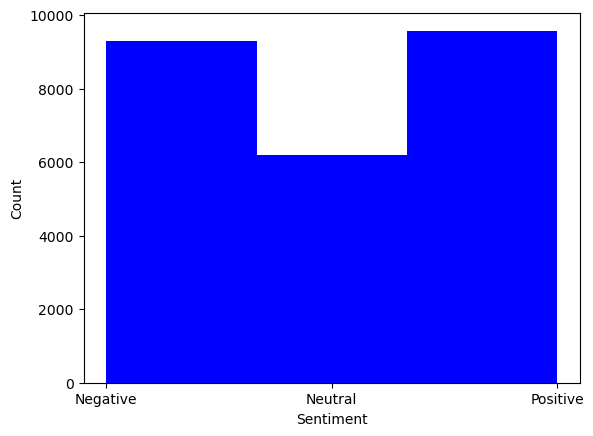

In [379]:
import matplotlib.pyplot as plt

plt.hist(data['Sentiment'], bins=3, color='blue')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks([-1, 0, 1], labels=['Negative', 'Neutral', 'Positive'])
plt.show()

#### Text preprocessing and using WordCloud to demostrate the most frequent words in Data

In [380]:
stopwords_url = "https://gist.githubusercontent.com/sebleier/554280/raw/7e0e4a1ce04c2bb7bd41089c9821dbcf6d0c786c/NLTK's%2520list%2520of%2520english%2520stopwords"
import requests
stopwords = requests.get(stopwords_url).text.split()

In [381]:
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 'her',
 'hers',
 'herself',
 'it',
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each',
 'few',
 'more',
 'most',
 'other',
 'some',
 'such',
 'no',
 'nor',
 '

In [382]:
def clean_text(x):
    from gensim.utils import simple_preprocess
    import contractions
    x = contractions.fix(x)
    x = ' '.join(simple_preprocess(x))
    return x
data['clean_text'] = data['Text'].apply(clean_text)

In [383]:
def tokenize(x, stopwords):
    from gensim.utils import simple_preprocess
    return [token for token in simple_preprocess(x['clean_text']) if token not in stopwords]
data['tokens'] = data.apply(tokenize, stopwords=stopwords, axis=1)

In [384]:
data

Text  Sentiment  \
0      RT @RobertBeadles: Yo💥\nEnter to WIN 1,000 Mon...          1   
1      #SriLanka surcharge on fuel removed!\n⛽📉\nThe ...         -1   
2      Net issuance increases to fund fiscal programs...          1   
3      RT @bentboolean: How much of Amazon's traffic ...          1   
4      $AMD Ryzen 4000 desktop CPUs looking ‘great’ a...          1   
...                                                  ...        ...   
25035  Seven-month sales of Ragutis , which is contro...         -1   
25036  The OMX Helsinki index was 0.33 pct lower at 9...         -1   
25037  In the Baltic states the company reports net s...         -1   
25038  The company said that its comparable operating...         -1   
25039  LONDON MarketWatch -- Share prices ended lower...         -1   

                                              clean_text  \
0      rt robertbeadles yo enter to win monarch token...   
1      srilanka surcharge on fuel removed the surchar...   
2      net issuance increases to fund fiscal programs...   
3      rt bentboolean how much of amazon traffic is s...   
4      amd ryzen desktop cpus looking great and on tr...   
...                                                  ...   
25035  seven month sales of ragutis which is controll...   
25036  the omx helsinki index was pct lower at while ...   
25037  in the baltic states the company reports net s...   
25038  the company said that its comparable operating...   
25039  london marketwatch share prices ended lower in...   

                                                  tokens  
0      [rt, robertbeadles, yo, enter, win, monarch, t...  
1      [srilanka, surcharge, fuel, removed, surcharge...  
2      [net, issuance, increases, fund, fiscal, progr...  
3      [rt, bentboolean, much, amazon, traffic, serve...  
4      [amd, ryzen, desktop, cpus, looking, great, tr...  
...                                                  ...  
25035  [seven, month, sales, ragutis, controlled, fin...  
25036  [omx, helsinki, index, pct, lower, omx, helsin...  
25037  [baltic, states, company, reports, net, sales,...  
25038  [company, said, comparable, operating, profit,...  
25039  [london, marketwatch, share, prices, ended, lo...  

[25040 rows x 4 columns]

### All Data WordCloud

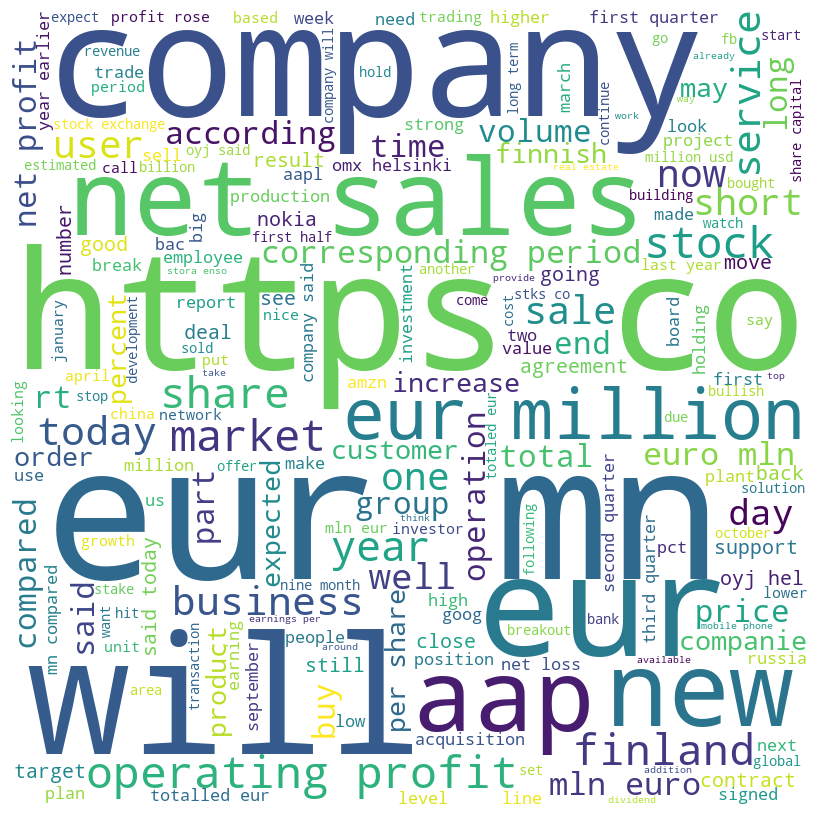

In [385]:
all_text = ' '.join(data['clean_text'].tolist())

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(all_text)

# Display the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

From the wordcloud that represents the whole data, we can see that there are many words regarding finance such as: share, profit, company, sales and etc.

But we also can see that there are some words that are better be included in stopwords, such as: https, finnish, finland, helsinki, russia - this happened because of small size dataset and because large amount of data used articles about finnish economy. I will add these words manually to stopwords before training sentiment analysis models.

### Providing additional WordClouds of each sentiment 

In [386]:
positive_data = data[data['Sentiment']== 1]
neutral_data = data[data['Sentiment'] == 0]
negative_data = data[data['Sentiment'] == -1]

#### Positive WordCloud 

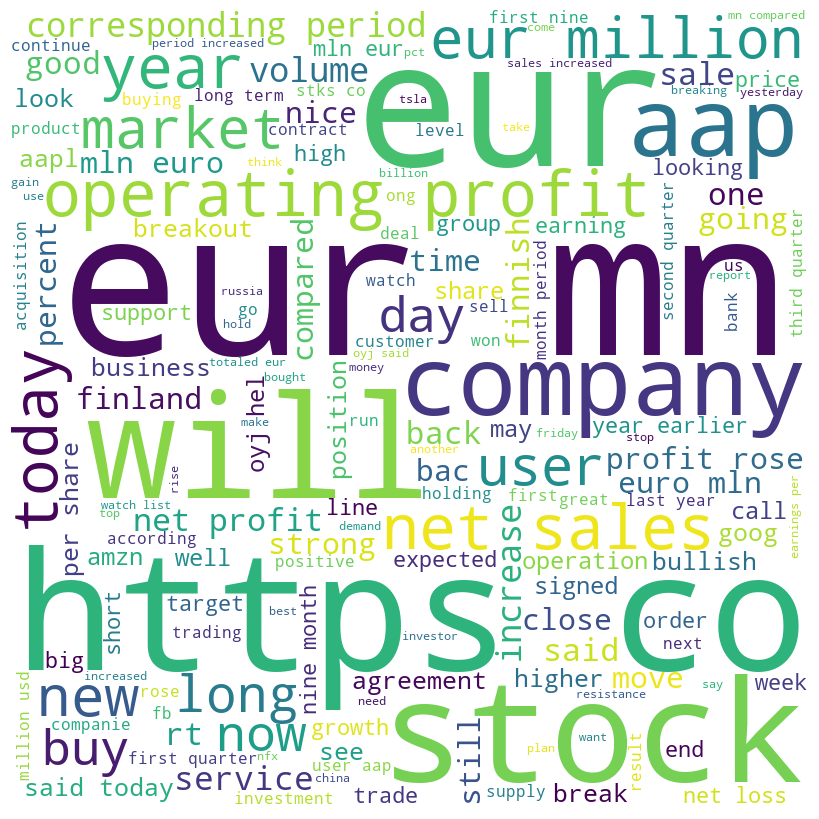

In [387]:
all_text_positive = ' '.join(positive_data['clean_text'].tolist())

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(all_text_positive)

# Display the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In the Positive WordCloud we can see positive words such as: profit, strong, breackout, increase, nice, rose and etc. which should help the sentiment analysis model to make predictions.

#### Neutral WordCloud

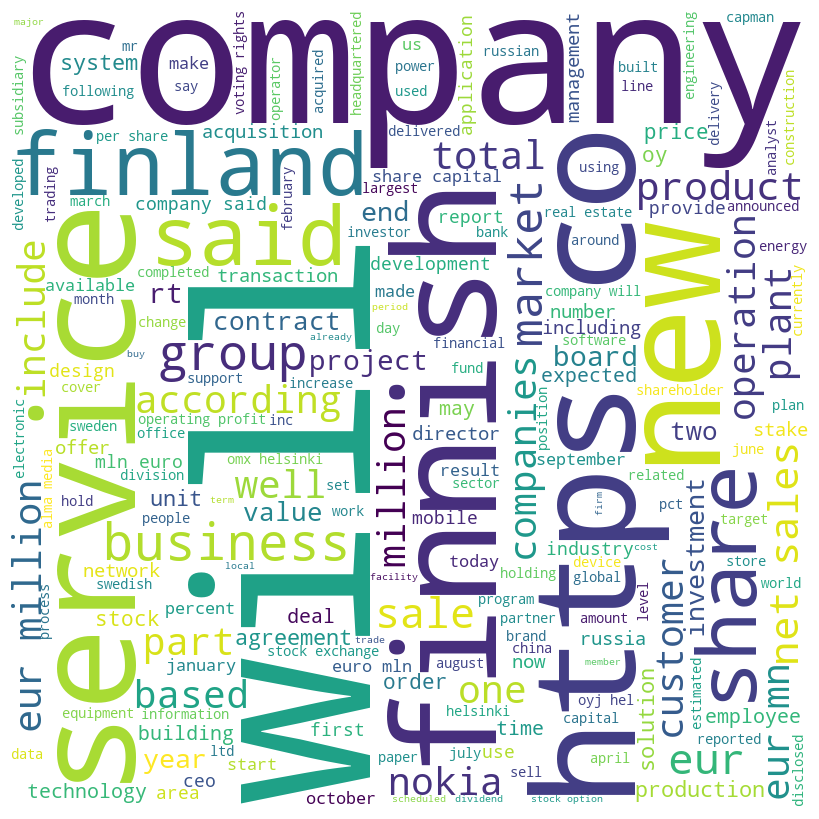

In [388]:
all_text_neutral = ' '.join(neutral_data['clean_text'].tolist())

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(all_text_neutral)

# Display the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Here in the Neutral WordCloud we have less 'positive' or 'negative' words, and most of the frequent words are just 'Business' lexicon. Hopefully it would help the model to make correct predictions.

#### Negative WordCloud

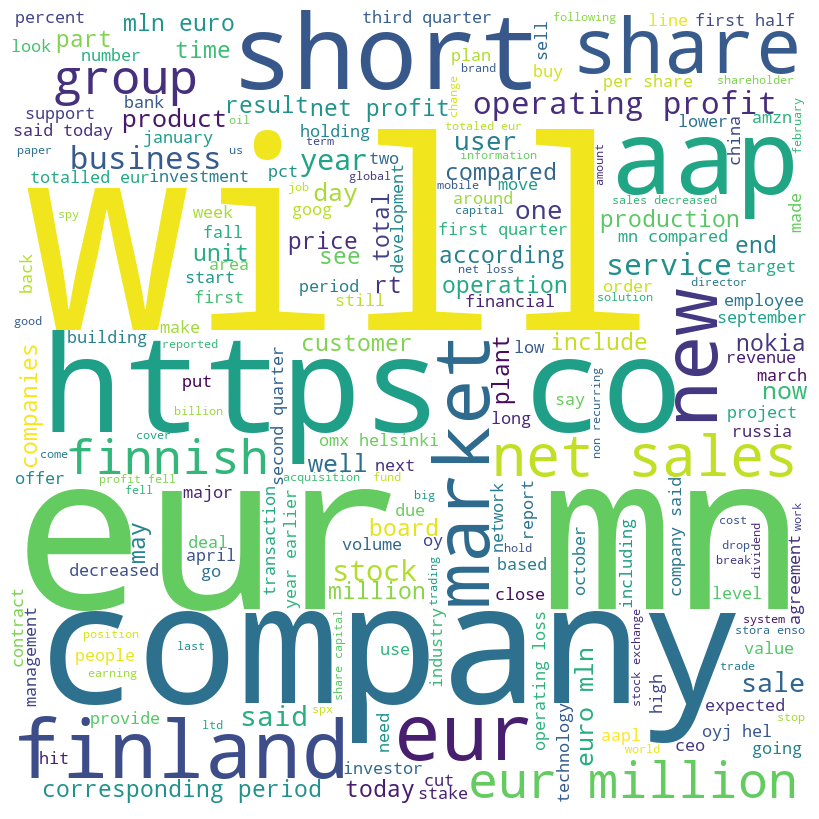

In [389]:
all_text_negative = ' '.join(negative_data['clean_text'].tolist())

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(all_text_negative)

# Display the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In the Negative WordCloud we can see much more 'negative' word and phrases such as: decreased, short, compared, operating loss, stop, fall and etc. But we also see some of the 'positive' words, which may confuse the model and it is interesting to see what the predictions will be.

# Modeling

In [390]:
data

Text  Sentiment  \
0      RT @RobertBeadles: Yo💥\nEnter to WIN 1,000 Mon...          1   
1      #SriLanka surcharge on fuel removed!\n⛽📉\nThe ...         -1   
2      Net issuance increases to fund fiscal programs...          1   
3      RT @bentboolean: How much of Amazon's traffic ...          1   
4      $AMD Ryzen 4000 desktop CPUs looking ‘great’ a...          1   
...                                                  ...        ...   
25035  Seven-month sales of Ragutis , which is contro...         -1   
25036  The OMX Helsinki index was 0.33 pct lower at 9...         -1   
25037  In the Baltic states the company reports net s...         -1   
25038  The company said that its comparable operating...         -1   
25039  LONDON MarketWatch -- Share prices ended lower...         -1   

                                              clean_text  \
0      rt robertbeadles yo enter to win monarch token...   
1      srilanka surcharge on fuel removed the surchar...   
2      net issuance increases to fund fiscal programs...   
3      rt bentboolean how much of amazon traffic is s...   
4      amd ryzen desktop cpus looking great and on tr...   
...                                                  ...   
25035  seven month sales of ragutis which is controll...   
25036  the omx helsinki index was pct lower at while ...   
25037  in the baltic states the company reports net s...   
25038  the company said that its comparable operating...   
25039  london marketwatch share prices ended lower in...   

                                                  tokens  
0      [rt, robertbeadles, yo, enter, win, monarch, t...  
1      [srilanka, surcharge, fuel, removed, surcharge...  
2      [net, issuance, increases, fund, fiscal, progr...  
3      [rt, bentboolean, much, amazon, traffic, serve...  
4      [amd, ryzen, desktop, cpus, looking, great, tr...  
...                                                  ...  
25035  [seven, month, sales, ragutis, controlled, fin...  
25036  [omx, helsinki, index, pct, lower, omx, helsin...  
25037  [baltic, states, company, reports, net, sales,...  
25038  [company, said, comparable, operating, profit,...  
25039  [london, marketwatch, share, prices, ended, lo...  

[25040 rows x 4 columns]

### Multinominal Logistic Regression

In [391]:
import nltk
import string
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import pandas as pd, os, pickle
import sklearn.feature_extraction.text as text

In [392]:
file_name_opnion_encoded  = 'opnion_finance.pickle'
file_name_vectorizer_pickle = 'vectorizer.pickle'

In [393]:
stop_words = nltk.corpus.stopwords.words('english')

In [394]:
new_list = ["https", "finland", "helsinki", "russia", "finnish", "rt" ]
stop_words = stop_words+new_list

In [395]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [396]:
if not os.path.isfile(file_name_opnion_encoded):
    # Get the 'text' column from the data frame
    texts = data['Text']

    # Preprocess the texts
    processed_texts = []
    for text in texts:
        # Lowercase the text
        text = text.lower()

        # Tokenize the text
        tokens = nltk.word_tokenize(text)

        # Remove stop words
        tokens = [token for token in tokens if token not in stop_words]

        # Remove punctuation
        punctuation = string.punctuation
        tokens = [token for token in tokens if token not in punctuation]

        # Stem or lemmatize the tokens
        stemmer = nltk.stem.PorterStemmer()
        tokens = [stemmer.stem(token) for token in tokens]

        # Join the tokens back into a single string
        processed_text = ' '.join(tokens)

        # Append the processed text to the list
        processed_texts.append(processed_text)

    # Use CountVectorizer to encode the texts
    vectorizer = CountVectorizer(ngram_range=(1, 2))
    encoded_texts = vectorizer.fit_transform(processed_texts)
    with open(file_name_vectorizer_pickle, 'w+b') as f:
        pickle.dump(vectorizer, f)
    with open(file_name_opnion_encoded, 'w+b') as f: 
        pickle.dump(encoded_texts,f, -1)  
else:
    with open(file_name_opnion_encoded, 'rb') as f:
        encoded_texts = pickle.load(f)
    with open(file_name_vectorizer_pickle, 'rb') as f:
        vectorizer = pickle.load(f)

In [397]:
import sklearn.linear_model as lm
from sklearn.model_selection import train_test_split, cross_val_score
file_name_model='regresion_logistic_finance_model.pickle'

In [399]:
# Get the labels for the text
if not os.path.isfile(file_name_model):
    labels = data['Sentiment']
    # Split the data into a training set and a test set
    features_train, features_test, labels_train, labels_test = train_test_split(encoded_texts, labels, test_size=0.2, random_state=42)
    # Train the logistic regression model
    model_logistic = lm.LogisticRegression(solver='lbfgs', max_iter=10000, multi_class='multinomial')
    model_logistic.fit(features_train, labels_train)
    accuracy = cross_val_score(model_logistic,features_train, labels_train,cv=10)
else:
    with open(file_name_model, 'rb') as f:
        model_logistic = pickle.load(f)

In [400]:
print(f"Accuracy: {accuracy.mean():.2f} (+/- {accuracy.std()*2:.2f})")

Accuracy: 0.62 (+/- 0.01)


In [401]:
import nbformat.v4 as nbformat
from sklearn import metrics

# Make predictions on the test set
predictions = model_logistic.predict(features_test)
probabilities = model_logistic.predict_proba(features_test)
# Compute the precision, recall, and F1 score
precision = metrics.precision_score(labels_test, predictions, average='weighted')
recall = metrics.recall_score(labels_test, predictions, average='weighted')
f1 = metrics.f1_score(labels_test, predictions, average='weighted')
auc = metrics.roc_auc_score(labels_test,probabilities, multi_class='ovo', average='weighted')
cm = metrics.confusion_matrix(labels_test,predictions, labels=[-1, 0, 1])
# Print the results
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)
print('AUC score:', auc)
print('Confusion Matrix', cm)

Precision: 0.6032221746313878
Recall: 0.6038338658146964
F1 score: 0.6035252252111546
AUC score: 0.8044487765659079
Confusion Matrix [[ 856  778  189]
 [ 770  421   33]
 [ 187   27 1747]]


In [406]:
label_names = ['-1', '0', '1']

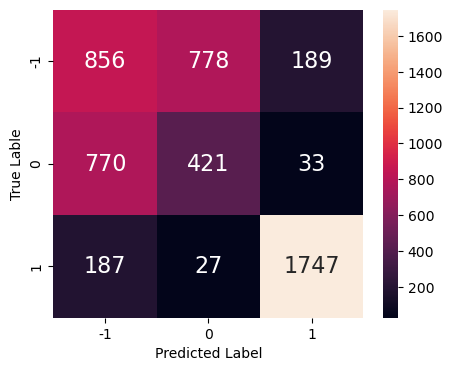

In [407]:
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize=(5,4))
# cm_df = pd.DataFrame(cm, index = ['Negative','Positive'], columns = ['Negative','Positive'])
sn.heatmap(cm, annot=True, fmt='d', annot_kws={'size':16}, xticklabels=label_names, yticklabels=label_names)
plt.xlabel("Predicted Label"); plt.ylabel('True Lable');

After evaluating the LogisticRegression model, we saw that the model is much better at predicting 'positive' text than 'negative' and 'neutral', we assume that df4 - which contains negative and neutral data labeled under one label is the reason to that. So, I decided to train the model again without df4 and see the results.

### Multinominal Logistic Regression model - Trained without df4 

In [408]:
data_with_out_df_4 = pd.concat([df1[['Text','Sentiment']],df2[['Text','Sentiment']],df3[['Text','Sentiment']]
                                ,df5_df6[['Text','Sentiment']]], axis=0, ignore_index=True)
data_with_out_df_4

Text  Sentiment
0      RT @RobertBeadles: Yo💥\nEnter to WIN 1,000 Mon...        1.0
1      #SriLanka surcharge on fuel removed!\n⛽📉\nThe ...       -1.0
2      Net issuance increases to fund fiscal programs...        1.0
3      RT @bentboolean: How much of Amazon's traffic ...        1.0
4      $AMD Ryzen 4000 desktop CPUs looking ‘great’ a...        1.0
...                                                  ...        ...
16778  Seven-month sales of Ragutis , which is contro...       -1.0
16779  The OMX Helsinki index was 0.33 pct lower at 9...       -1.0
16780  In the Baltic states the company reports net s...       -1.0
16781  The company said that its comparable operating...       -1.0
16782  LONDON MarketWatch -- Share prices ended lower...       -1.0

[16783 rows x 2 columns]

In [409]:
data_with_out_df_4["Sentiment"].value_counts()

 1.0    6939
 0.0    6182
-1.0    3662
Name: Sentiment, dtype: int64

In [410]:
file_name_opnion_encoded  = 'opnion_finance_2.pickle'
file_name_vectorizer_pickle = 'vectorizer_2.pickle'

In [411]:
if not os.path.isfile(file_name_opnion_encoded):
    # Get the 'text' column from the data frame
    texts = data_with_out_df_4['Text']

    # Preprocess the texts
    processed_texts = []
    for text in texts:
        # Lowercase the text
        text = text.lower()

        # Tokenize the text
        tokens = nltk.word_tokenize(text)

        # Remove stop words
        tokens = [token for token in tokens if token not in stop_words]

        # Remove punctuation
        punctuation = string.punctuation
        tokens = [token for token in tokens if token not in punctuation]

        # Stem or lemmatize the tokens
        stemmer = nltk.stem.PorterStemmer()
        tokens = [stemmer.stem(token) for token in tokens]

        # Join the tokens back into a single string
        processed_text = ' '.join(tokens)

        # Append the processed text to the list
        processed_texts.append(processed_text)

    # Use CountVectorizer to encode the texts
    vectorizer = CountVectorizer(ngram_range=(1, 2))
    encoded_texts = vectorizer.fit_transform(processed_texts)
    with open(file_name_vectorizer_pickle, 'w+b') as f:
        pickle.dump(vectorizer, f)
    with open(file_name_opnion_encoded, 'w+b') as f: 
        pickle.dump(encoded_texts,f, -1)  
else:
    with open(file_name_opnion_encoded, 'rb') as f:
        encoded_texts = pickle.load(f)
    with open(file_name_vectorizer_pickle, 'rb') as f:
        vectorizer = pickle.load(f)

In [412]:
import sklearn.linear_model as lm
from sklearn.model_selection import train_test_split, cross_val_score
file_name_model='regresion_logistic_finance_model_2.pickle'

In [413]:
# Get the labels for the text
if not os.path.isfile(file_name_model):
    labels = data_with_out_df_4['Sentiment']
    # Split the data into a training set and a test set
    features_train, features_test, labels_train, labels_test = train_test_split(encoded_texts, labels, test_size=0.2, random_state=42)
    # Train the logistic regression model
    model_logistic = lm.LogisticRegression(solver='lbfgs', max_iter=10000, multi_class='multinomial')
    model_logistic.fit(features_train, labels_train)
    # Evaluate the model on the test set (using cross validation)
    accuracy = cross_val_score(model_logistic,features_train, labels_train,cv=10)
#     print("Accuracy:': %0.2f (+/- %0.2f)") % (accuracy.mean(), accuracy.std()*2)
else:
    with open(file_name_model, 'rb') as f:
        model_logistic = pickle.load(f)

In [414]:
print(f"Accuracy: {accuracy.mean():.2f} (+/- {accuracy.std()*2:.2f})")

Accuracy: 0.84 (+/- 0.02)


In [415]:
import nbformat.v4 as nbformat
from sklearn import metrics

# Make predictions on the test set
predictions = model_logistic.predict(features_test)
probabilities = model_logistic.predict_proba(features_test)
# Compute the precision, recall, and F1 score
precision = metrics.precision_score(labels_test, predictions, average='weighted')
recall = metrics.recall_score(labels_test, predictions, average='weighted')
f1 = metrics.f1_score(labels_test, predictions, average='weighted')
auc = metrics.roc_auc_score(labels_test,probabilities, multi_class='ovo', average='weighted')
cm = metrics.confusion_matrix(labels_test,predictions, labels=[-1, 0, 1])
# Print the results
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)
print('AUC score:', auc)
print('Confusion Matrix', cm)

Precision: 0.8640382324011565
Recall: 0.8650580875781948
F1 score: 0.8631535202442565
AUC score: 0.9545430144098729
Confusion Matrix [[ 491   35  175]
 [  15 1184   65]
 [  88   75 1229]]


In [416]:
label_names = ['-1', '0', '1']

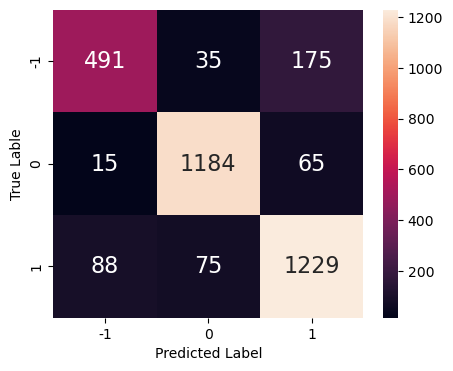

In [417]:
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize=(5,4))
# cm_df = pd.DataFrame(cm, index = ['Negative','Positive'], columns = ['Negative','Positive'])
sn.heatmap(cm, annot=True, fmt='d', annot_kws={'size':16}, xticklabels=label_names, yticklabels=label_names)
plt.xlabel("Predicted Label"); plt.ylabel('True Lable');

In [418]:
from sklearn.metrics import classification_report
print(classification_report(labels_test, predictions))

              precision    recall  f1-score   support

        -1.0       0.83      0.70      0.76       701
         0.0       0.91      0.94      0.93      1264
         1.0       0.84      0.88      0.86      1392

    accuracy                           0.87      3357
   macro avg       0.86      0.84      0.85      3357
weighted avg       0.86      0.87      0.86      3357



As we can see without df4 the results are much better, and this after I reduced more than 30% of the training data. But it is important to note, that by removing df4, I removed around 60% of the 'negative' labels, which leading us to more exact predictions on 'positive' and even 'neutral' data, but complecates the prediction of 'negative' sentiment in texts.

After witnessing the results, I can assume that the reason for better predictions on 'positive' and 'neutral' lays in the fact that the representation of 'positive' and 'neutral' is much bigger than of 'negative' labels. 

1  :  6939

0  :  6182

-1  :  3662

So for further research I decided to add more negative data to the training data, in order to even the weights of each sentiment.

## Multinominal Logistic Regression - adding new 'negative' data

### Negative Data Description
#####  Sentiment Analysis on Financial Tweets: Data was taken from kaggle https://www.kaggle.com/datasets/vivekrathi055/sentiment-analysis-on-financial-tweets?select=tweet_sentiment.csv, https://www.kaggle.com/datasets/davidwallach/financial-tweets
##### Description of the data: preprocessed data that was downloaded from twitter in july 2018 and contains tweets about different companies that were twitted by major economic influencers : 'MarketWatch', 'business', 'YahooFinance', 'TechCrunch', 'WSJ', 'Forbes', 'FT', 'TheEconomist', 'nytimes', 'Reuters', 'GerberKawasaki', 'jimcramer', 'TheStreet', 'TheStalwart', 'TruthGundlach', 'Carl_C_Icahn', 'ReformedBroker', 'benbernanke', 'bespokeinvest', 'BespokeCrypto', 'stlouisfed', 'federalreserve', 'GoldmanSachs', 'ianbremmer', 'MorganStanley', 'AswathDamodaran', 'mcuban', 'muddywatersre', 'StockTwits', 'SeanaNSmith'
##### This data was later annotated by another user with 3 labels - positive, negative and neutral. Our intent is to take only the 'negative' tweets in order to inreach the data.


In [419]:
path9 = r"D:\MachineLearning\Financial_Datasets\9_Sentiment_analysis_on_financial_tweets.csv"
df9 = pd.read_csv(path9)

In [420]:
df9["sentiment"].value_counts()

 0    17330
 1     8512
-1     2598
Name: sentiment, dtype: int64

As we can see this dataset has little 'negative' data, but it is just sufficient for us because it will even our dataset.

I thought about adding all this dataset to our research, but if I did so the data would remain un-even and would not help the research.

In [421]:
negative_df9 = df9[df9['sentiment']== -1]
negative_df9

cleaned_tweets  sentiment
2                                say american dream dead         -1
4      satellit avoid attack space junk circl earth paid         -1
10     u propos expedit appeal fight amp time warner ...         -1
14     custom urg boycott mgm resort casino file laws...         -1
23      ebay revenu miss weak u sport season hit stubhub         -1
...                                                  ...        ...
28409  twtr mgm mgm resort suffer backlash su shoot v...         -1
28410  day ago btc ran amp alt fire week bitcoin jump...         -1
28411                          fake event aapl timestamp         -1
28414  rt vote result import peopl call stupid peopl ...         -1
28428                              kill witch l domo via         -1

[2598 rows x 2 columns]

In [422]:
negative_df9 = negative_df9.rename(columns={'cleaned_tweets':'Text'})
negative_df9 = negative_df9.rename(columns={'sentiment':'Sentiment'})

In [423]:
data_withoutdf4_withdf9 = pd.concat([df1[['Text','Sentiment']],df2[['Text','Sentiment']],df3[['Text','Sentiment']]
                                ,df5_df6[['Text','Sentiment']],negative_df9[['Text','Sentiment']]],
                                    axis=0, ignore_index=True)
data_withoutdf4_withdf9

Text  Sentiment
0      RT @RobertBeadles: Yo💥\nEnter to WIN 1,000 Mon...        1.0
1      #SriLanka surcharge on fuel removed!\n⛽📉\nThe ...       -1.0
2      Net issuance increases to fund fiscal programs...        1.0
3      RT @bentboolean: How much of Amazon's traffic ...        1.0
4      $AMD Ryzen 4000 desktop CPUs looking ‘great’ a...        1.0
...                                                  ...        ...
19376  twtr mgm mgm resort suffer backlash su shoot v...       -1.0
19377  day ago btc ran amp alt fire week bitcoin jump...       -1.0
19378                          fake event aapl timestamp       -1.0
19379  rt vote result import peopl call stupid peopl ...       -1.0
19380                              kill witch l domo via       -1.0

[19381 rows x 2 columns]

In [424]:
data_withoutdf4_withdf9["Sentiment"].value_counts()

 1.0    6939
-1.0    6260
 0.0    6182
Name: Sentiment, dtype: int64

In [425]:
file_name_opnion_encoded  = 'opnion_finance_3.pickle'
file_name_vectorizer_pickle = 'vectorizer_3.pickle'

In [426]:
if not os.path.isfile(file_name_opnion_encoded):
    # Get the 'text' column from the data frame
    texts = data_withoutdf4_withdf9['Text']

    # Preprocess the texts
    processed_texts = []
    for text in texts:
        # Lowercase the text
        text = text.lower()

        # Tokenize the text
        tokens = nltk.word_tokenize(text)

        # Remove stop words
        tokens = [token for token in tokens if token not in stop_words]

        # Remove punctuation
        punctuation = string.punctuation
        tokens = [token for token in tokens if token not in punctuation]

        # Stem or lemmatize the tokens
        stemmer = nltk.stem.PorterStemmer()
        tokens = [stemmer.stem(token) for token in tokens]

        # Join the tokens back into a single string
        processed_text = ' '.join(tokens)

        # Append the processed text to the list
        processed_texts.append(processed_text)

    # Use CountVectorizer to encode the texts
    vectorizer = CountVectorizer(ngram_range=(1, 2))
    encoded_texts = vectorizer.fit_transform(processed_texts)
    with open(file_name_vectorizer_pickle, 'w+b') as f:
        pickle.dump(vectorizer, f)
    with open(file_name_opnion_encoded, 'w+b') as f: 
        pickle.dump(encoded_texts,f, -1)  
else:
    with open(file_name_opnion_encoded, 'rb') as f:
        encoded_texts = pickle.load(f)
    with open(file_name_vectorizer_pickle, 'rb') as f:
        vectorizer = pickle.load(f)

In [427]:
import sklearn.linear_model as lm
from sklearn.model_selection import train_test_split, cross_val_score
file_name_model='regresion_logistic_finance_model_3.pickle'

In [428]:
# Get the labels for the text
if not os.path.isfile(file_name_model):
    labels = data_withoutdf4_withdf9['Sentiment']
    # Split the data into a training set and a test set
    features_train, features_test, labels_train, labels_test = train_test_split(encoded_texts, labels, test_size=0.2, random_state=42)
    # Train the logistic regression model
    model_logistic = lm.LogisticRegression(solver='lbfgs', max_iter=10000, multi_class='multinomial')
    model_logistic.fit(features_train, labels_train)
    # Evaluate the model on the test set (using cross validation)
    accuracy = cross_val_score(model_logistic,features_train, labels_train,cv=10)
#     print("Accuracy:': %0.2f (+/- %0.2f)") % (accuracy.mean(), accuracy.std()*2)
else:
    with open(file_name_model, 'rb') as f:
        model_logistic = pickle.load(f)

In [429]:
print(f"Accuracy: {accuracy.mean():.2f} (+/- {accuracy.std()*2:.2f})")

Accuracy: 0.86 (+/- 0.01)


In [430]:
import nbformat.v4 as nbformat
from sklearn import metrics

# Make predictions on the test set
predictions = model_logistic.predict(features_test)
probabilities = model_logistic.predict_proba(features_test)
# Compute the precision, recall, and F1 score
precision = metrics.precision_score(labels_test, predictions, average='weighted')
recall = metrics.recall_score(labels_test, predictions, average='weighted')
f1 = metrics.f1_score(labels_test, predictions, average='weighted')
auc = metrics.roc_auc_score(labels_test,probabilities, multi_class='ovo', average='weighted')
cm = metrics.confusion_matrix(labels_test,predictions, labels=[-1, 0, 1])
# Print the results
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)
print('AUC score:', auc)
print('Confusion Matrix', cm)

Precision: 0.8722048474153936
Recall: 0.8723239618261542
F1 score: 0.8719688662834492
AUC score: 0.9644216615707375
Confusion Matrix [[1002   37  185]
 [  26 1155   50]
 [ 130   67 1225]]


Based on the results, the model seems to have good performance overall, with high precision, recall, and F1 score for all three classes. The AUC score also indicates that the model can distinguish between the three classes with high accuracy. 

In [431]:
label_names = ['-1', '0', '1']

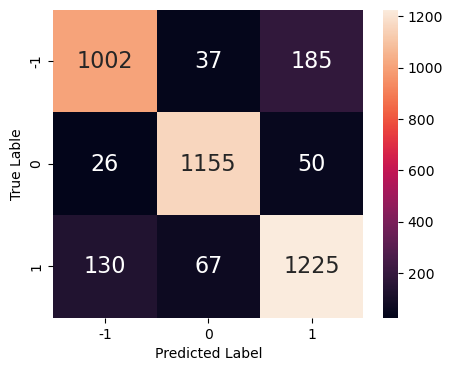

In [432]:
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize=(5,4))
# cm_df = pd.DataFrame(cm, index = ['Negative','Positive'], columns = ['Negative','Positive'])
sn.heatmap(cm, annot=True, fmt='d', annot_kws={'size':16}, xticklabels=label_names, yticklabels=label_names)
plt.xlabel("Predicted Label"); plt.ylabel('True Lable');

In [433]:
from sklearn.metrics import classification_report
print(classification_report(labels_test, predictions))

              precision    recall  f1-score   support

        -1.0       0.87      0.82      0.84      1224
         0.0       0.92      0.94      0.93      1231
         1.0       0.84      0.86      0.85      1422

    accuracy                           0.87      3877
   macro avg       0.87      0.87      0.87      3877
weighted avg       0.87      0.87      0.87      3877



The report shows that the model performs relatively well for all three labels, with an overall accuracy of 0.87. However, there are differences in performance between the three labels, with label 0 having the highest f1-score and label -1 having the lowest f1-score.

In addition there is quite difference in the cross-validation accuracy (74%) and the overall acurracy (87%). A lower accuracy score in cross-validation could indicate that the model is overfitting to the training data, meaning that it is not able to generalize well to new, unseen data. It could also mean that the dataset is imbalanced or noisy, which can make it more difficult for the model to accurately predict the target variable.

However, it is possible to have a lower accuracy score in cross-validation compared to a single train-test split, especially if the data is small or the model is complex, in our case the data is small. In cross-validation, the model is trained and evaluated multiple times on different subsets of the data. This can result in a more realistic estimate of the model's performance on unseen data, but it can also lead to a wider range of accuracy scores.
So our desicion so far is to train other models, evaluate them and decide based on different parameter which one is better.

## SVD - Multinominal logit

In [434]:
def clean_text(x):
    from gensim.utils import simple_preprocess
    import contractions
    x = contractions.fix(x)
    x = ' '.join(simple_preprocess(x))
    return x

In [435]:
from tqdm import tqdm
tqdm.pandas()
data_withoutdf4_withdf9['clean_text'] = data_withoutdf4_withdf9['Text'].progress_apply(clean_text)

100%|█████████████████████████████████████████████████████████████████████████| 19381/19381 [00:00<00:00, 34094.64it/s]


In [436]:
%matplotlib inline
import gensim
import logging
import numpy as np

In [245]:
def tokenize(x, stopwords):
    from gensim.utils import simple_preprocess
    return [ token for token in simple_preprocess(x['clean_text']) if token not in stopwords]
data_withoutdf4_withdf9['tokens'] = data_withoutdf4_withdf9.progress_apply(tokenize, stopwords=stop_words, axis=1)

100%|█████████████████████████████████████████████████████████████████████████| 19381/19381 [00:01<00:00, 15898.32it/s]


In [437]:
train_test_mask = np.random.random((len(data_withoutdf4_withdf9),))<0.8
train_data = data_withoutdf4_withdf9[train_test_mask].copy()
test_data = data_withoutdf4_withdf9[~train_test_mask].copy()
print(f"Train<->test data: {len(train_data)} <-> {len(test_data)}")

Train<->test data: 15492 <-> 3889


In [438]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD

svd_pipeline_hashtags = Pipeline([
    ('vect',CountVectorizer(stop_words=stopwords)),
    ('tfidf',TfidfTransformer()),
    ('norm',Normalizer(norm='l2')),
    ('svd', TruncatedSVD(n_components = 150))
    ])
svd_doc_vectors = svd_pipeline_hashtags.fit_transform(tqdm(train_data['clean_text']))

100%|█████████████████████████████████████████████████████████████████████████| 15492/15492 [00:00<00:00, 77992.16it/s]


In [439]:
print('Dictionary size: {}'.format(len(svd_pipeline_hashtags.named_steps['vect'].get_feature_names_out())))

Dictionary size: 19395


In [440]:
from sklearn.linear_model import LogisticRegression
svd_logit_model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
svd_logit_model.fit(X=svd_doc_vectors,y=train_data['Sentiment'])

LogisticRegression(multi_class='multinomial')

In [441]:
train_accuracy_scores = svd_logit_model.score(svd_doc_vectors, train_data['Sentiment'])
print(f"train accuracy scores {train_accuracy_scores:2.2f}")

train accuracy scores 0.69


In [442]:
accuracy = cross_val_score(svd_logit_model, svd_doc_vectors, train_data['Sentiment'], cv=10)
print("Accuracy scores:", scores)
print("Mean accuracy:", scores.mean())

D:\Anaconda\envs\machinelearning\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy scores: [0.46872985 0.7311412  0.75950999 0.63571889 0.82140554 0.75096774
 0.91935484 0.91548387 0.90258065 0.86967742]
Mean accuracy: 0.7774569996464299


In [443]:
test_svd_vectors = svd_pipeline_hashtags.transform(test_data['clean_text'])
test_svd_predicted_classes = svd_logit_model.predict(test_svd_vectors)

In [444]:
from sklearn.metrics import classification_report
print(classification_report(test_data['Sentiment'], test_svd_predicted_classes))

              precision    recall  f1-score   support

        -1.0       0.74      0.65      0.69      1284
         0.0       0.66      0.80      0.73      1206
         1.0       0.65      0.61      0.63      1399

    accuracy                           0.68      3889
   macro avg       0.68      0.69      0.68      3889
weighted avg       0.68      0.68      0.68      3889



The report shows that the model performs a bit worse than LogisticRegression without SVD, but still has pretty impressive results on the 3 labels, with overall accuracy of 69%. Although this model shows results that are a bit lower, they seem to be more stable, because overall accuracy and crossvalidation accuracy are the same 69%, without the big gap we've seen in LogisticRegression (74% crossvalidation accuracy and 87% overall accuracy).

It is interesting to note that in this model the prediction on the 'positive' as the lowest F1 score, while in the previous model 'positive' label had the best score.

In [445]:
from sklearn import metrics
from tqdm import tqdm

y_true = test_data['Sentiment']
probabilities = svd_logit_model.predict_proba(test_svd_vectors)
# Get the predicted labels
y_pred = test_svd_predicted_classes
# Calculate the accuracy
# accuracy = metrics.accuracy_score(y_true, y_pred)
# Calculate the precision
precision = metrics.precision_score(y_true, y_pred, average='weighted')
# Calculate the recall
recall = metrics.recall_score(y_true, y_pred,average='weighted')
# Calculate the F1 score
f1 = metrics.f1_score(y_true, y_pred,average='weighted')
auc=metrics.roc_auc_score(y_true, probabilities, multi_class='ovo', average='weighted')
cm = metrics.confusion_matrix(y_true,y_pred ,labels=[-1, 0, 1])

# Print the results
# print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)
print('AUC score:', auc)
print('Confusion Matrix', cm)

Precision: 0.6835922170367887
Recall: 0.6808948315762406
F1 score: 0.6791486036601128
AUC score: 0.8540106969546262
Confusion Matrix [[837 151 296]
 [ 75 963 168]
 [216 335 848]]


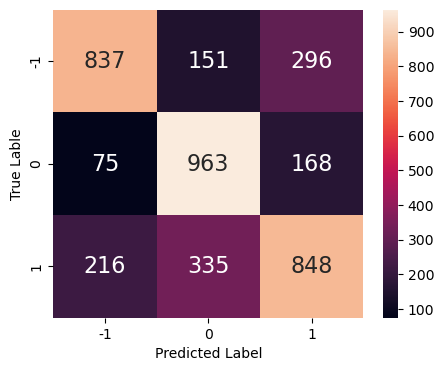

In [446]:
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize=(5,4))
# cm_df = pd.DataFrame(cm, index = ['Negative','Positive'], columns = ['Negative','Positive'])
sn.heatmap(cm, annot=True, fmt='d', annot_kws={'size':16}, xticklabels=label_names, yticklabels=label_names)
plt.xlabel("Predicted Label"); plt.ylabel('True Lable');

Here we also see that the model has lower perfomance but it is more stable and we can rely that the actual accuracy on new data will be around 69%.

## SVD - XGboost

In [447]:
train_data_XGboost = train_data.copy()

In [448]:
train_data_XGboost

Text  Sentiment  \
0      RT @RobertBeadles: Yo💥\nEnter to WIN 1,000 Mon...        1.0   
1      #SriLanka surcharge on fuel removed!\n⛽📉\nThe ...       -1.0   
2      Net issuance increases to fund fiscal programs...        1.0   
3      RT @bentboolean: How much of Amazon's traffic ...        1.0   
4      $AMD Ryzen 4000 desktop CPUs looking ‘great’ a...        1.0   
...                                                  ...        ...   
19376  twtr mgm mgm resort suffer backlash su shoot v...       -1.0   
19377  day ago btc ran amp alt fire week bitcoin jump...       -1.0   
19378                          fake event aapl timestamp       -1.0   
19379  rt vote result import peopl call stupid peopl ...       -1.0   
19380                              kill witch l domo via       -1.0   

                                              clean_text  
0      rt robertbeadles yo enter to win monarch token...  
1      srilanka surcharge on fuel removed the surchar...  
2      net issuance increases to fund fiscal programs...  
3      rt bentboolean how much of amazon traffic is s...  
4      amd ryzen desktop cpus looking great and on tr...  
...                                                  ...  
19376  twtr mgm mgm resort suffer backlash su shoot v...  
19377  day ago btc ran amp alt fire week bitcoin jump...  
19378                          fake event aapl timestamp  
19379  rt vote result import peopl call stupid peopl ...  
19380                                kill witch domo via  

[15492 rows x 3 columns]

In [449]:
train_data_XGboost['Sentiment'] = train_data_XGboost['Sentiment'].replace(1, 2)

In [450]:
train_data_XGboost['Sentiment'] = train_data_XGboost['Sentiment'].replace(0, 1)

In [451]:
train_data_XGboost['Sentiment'] = train_data_XGboost['Sentiment'].replace(-1, 0)

In [452]:
train_data_XGboost['Sentiment']

0        2.0
1        0.0
2        2.0
3        2.0
4        2.0
        ... 
19376    0.0
19377    0.0
19378    0.0
19379    0.0
19380    0.0
Name: Sentiment, Length: 15492, dtype: float64

In [453]:
test_data_XGboost = test_data.copy()

In [454]:
test_data_XGboost['Sentiment'] = test_data_XGboost['Sentiment'].replace(1, 2)

In [455]:
test_data_XGboost['Sentiment'] = test_data_XGboost['Sentiment'].replace(0, 1)

In [456]:
test_data_XGboost['Sentiment'] = test_data_XGboost['Sentiment'].replace(-1, 0)

In [457]:
test_data_XGboost['Sentiment']

11       0.0
19       1.0
20       1.0
21       0.0
32       1.0
        ... 
19360    0.0
19366    0.0
19369    0.0
19373    0.0
19375    0.0
Name: Sentiment, Length: 3889, dtype: float64

In [458]:
from xgboost import XGBClassifier
svd_xgboost_model = XGBClassifier()
svd_xgboost_model.fit(X=svd_doc_vectors,y=train_data_XGboost['Sentiment'])

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [460]:
test_svd_xgboost_vectors = svd_pipeline_hashtags.transform(test_data_XGboost['clean_text'])
test_svd_xgboost_predicted_classes = svd_xgboost_model.predict(test_svd_xgboost_vectors)

In [461]:
from sklearn.metrics import classification_report
print(classification_report(test_data_XGboost['Sentiment'], test_svd_xgboost_predicted_classes))

              precision    recall  f1-score   support

         0.0       0.82      0.76      0.79      1284
         1.0       0.87      0.92      0.90      1206
         2.0       0.79      0.81      0.80      1399

    accuracy                           0.83      3889
   macro avg       0.83      0.83      0.83      3889
weighted avg       0.83      0.83      0.83      3889



In [462]:
scores = cross_val_score(svd_xgboost_model, svd_doc_vectors, train_data_XGboost['Sentiment'], cv=10)
print("Accuracy scores:", scores)
print("Mean accuracy:", scores.mean())

Accuracy scores: [0.48064516 0.74129032 0.76694642 0.63266624 0.79987088 0.77469335
 0.9186572  0.93221433 0.90058102 0.86830213]
Mean accuracy: 0.7815867052625002


# zero-shot-classification - ProsusAI/finbert

In [464]:
from transformers import pipeline
# Define pipeline
classifier = pipeline(task="zero-shot-classification", 
                      model="ProsusAI/finbert",
                      device=0) 

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at ProsusAI/finbert and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Failed to determine 'entailment' label id from the label2id mapping in the model config. Setting to -1. Define a descriptive label2id mapping in the model config to ensure correct outputs.


In [576]:
def score_Zero_shot(text):
  # Flair tokenization
  sequences = [text]
  # Define the candidate labels 
  candidate_labels = ["positive", "neutral", "negative"]
  # Set the hyppothesis template
  hypothesis_template = "The sentiment of this review is {}."  

  # Prediction results
  hf_prediction = classifier(sequences, candidate_labels, hypothesis_template=hypothesis_template)
    
  # Return the score and the predicted label
  return hf_prediction 

In [581]:
text_labeled = score_Zero_shot(["very very good, the best actor"])

In [582]:
predicted_label = lal[0]["labels"][0]
score = lal[0]["scores"][0]

# # Convert the predicted label to encoded label
# encoded_label = -1 if predicted_label == "positive" else (1 if predicted_label == "negative" else 0)

In [583]:
predicted_label

'negative'

In [584]:
score

0.43040528893470764

In [546]:
score_zero_shot = test_data.copy()

In [547]:
from tqdm import tqdm
tqdm.pandas()
score_zero_shot['scores_Zero_shot'] = score_zero_shot['Text'].progress_apply(lambda x: score_Zero_shot(x))

100%|██████████████████████████████████████████████████████████████████████████████| 3889/3889 [49:05<00:00,  1.32it/s]


In [548]:
score_zero_shot['scores_Zero_shot_scores'] = score_zero_shot['scores_Zero_shot'].progress_apply(lambda x: x[0]['labels'][0])

100%|██████████████████████████████████████████████████████████████████████████| 3889/3889 [00:00<00:00, 554177.08it/s]


In [549]:
score_zero_shot['Sentiment'] = score_zero_shot['Sentiment'].progress_apply(lambda x: "negative" if x == -1 else ("neutral" if x == 0 else "positive"))


100%|██████████████████████████████████████████████████████████████████████████| 3889/3889 [00:00<00:00, 779194.05it/s]


In [550]:
score_zero_shot

Text Sentiment  \
11     Guys if market stays below 10000 till 2 expect...  negative   
19     @EpiphronR  China Population 1.3 Billion Reaso...   neutral   
20     RT @RafKadian: $tsla &amp; $nio fot the day #t...   neutral   
21     Q1 2020 EPS Estimates for Merck &amp; Co., Inc...  negative   
32     TOS frozen for anyone else?\n\n#es_f $spx $spy...   neutral   
...                                                  ...       ...   
19360           trade low fee binanc regist bonu brx gup  negative   
19366                        thought fb elimin fake news  negative   
19369  btc marketwatch cryptowatch barri silbert say ...  negative   
19373                    c max pain matur maxpain option  negative   
19375         rt crypto alright fuck anim sold btc break  negative   

                                              clean_text  \
11     guys if market stays below till expect major m...   
19     epiphronr china population billion reasons iq ...   
20     rt rafkadian tsla amp nio fot the day trading ...   
21     eps estimates for merck amp co inc mrk lowered...   
32     tos frozen for anyone else es_f spx spy option...   
...                                                  ...   
19360           trade low fee binanc regist bonu brx gup   
19366                        thought fb elimin fake news   
19369  btc marketwatch cryptowatch barri silbert say ...   
19373                      max pain matur maxpain option   
19375         rt crypto alright fuck anim sold btc break   

                                        scores_Zero_shot  \
11     [{'sequence': 'Guys if market stays below 1000...   
19     [{'sequence': '@EpiphronR  China Population 1....   
20     [{'sequence': 'RT @RafKadian: $tsla &amp; $nio...   
21     [{'sequence': 'Q1 2020 EPS Estimates for Merck...   
32     [{'sequence': 'TOS frozen for anyone else?

#e...   
...                                                  ...   
19360  [{'sequence': 'trade low fee binanc regist bon...   
19366  [{'sequence': 'thought fb elimin fake news', '...   
19369  [{'sequence': 'btc marketwatch cryptowatch bar...   
19373  [{'sequence': 'c max pain matur maxpain option...   
19375  [{'sequence': 'rt crypto alright fuck anim sol...   

      scores_Zero_shot_scores  
11                   negative  
19                   negative  
20                   negative  
21                   negative  
32                   negative  
...                       ...  
19360                negative  
19366                negative  
19369                negative  
19373                negative  
19375                negative  

[3889 rows x 5 columns]

In [551]:
score_zero_shot['Sentiment'].value_counts()

positive    1399
negative    1284
neutral     1206
Name: Sentiment, dtype: int64

In [552]:
score_zero_shot['scores_Zero_shot_scores'].value_counts()

negative    3591
positive     169
neutral      129
Name: scores_Zero_shot_scores, dtype: int64

In [553]:
from sklearn.metrics import classification_report
print(classification_report(score_zero_shot['Sentiment'],score_zero_shot['scores_Zero_shot_scores']))

              precision    recall  f1-score   support

    negative       0.30      0.83      0.44      1284
     neutral       0.12      0.01      0.02      1206
    positive       0.04      0.01      0.01      1399

    accuracy                           0.28      3889
   macro avg       0.15      0.28      0.16      3889
weighted avg       0.15      0.28      0.16      3889



In [555]:
from sklearn.metrics import classification_report
print(classification_report(score_zero_shot['Sentiment'],score_zero_shot['scores_Zero_shot_scores']))

              precision    recall  f1-score   support

    negative       0.30      0.83      0.44      1284
     neutral       0.12      0.01      0.02      1206
    positive       0.04      0.01      0.01      1399

    accuracy                           0.28      3889
   macro avg       0.15      0.28      0.16      3889
weighted avg       0.15      0.28      0.16      3889



# zero-shot-classification - facebook/bart-large-xsum

In [588]:
from transformers import pipeline
def score_Zero_shot(text):
    classifier = pipeline(
        "zero-shot-classification",
        model="facebook/bart-large-xsum",
        device=0
    )
    sequences = [text]
    result = classifier(
        sequences,
        candidate_labels=["positive", "negative", "neutral"],
        hypothesis_template="This text is {}."
    )

    return result 


In [589]:
score_zero_shot = test_data.copy()

In [590]:
from tqdm import tqdm
tqdm.pandas()
score_zero_shot['scores_Zero_shot'] = score_zero_shot['clean_text'].progress_apply(lambda x: score_Zero_shot(x))

  0%|                                                                                         | 0/3889 [00:00<?, ?it/s]All model checkpoint layers were used when initializing TFBartForSequenceClassification.

Some layers of TFBartForSequenceClassification were not initialized from the model checkpoint at facebook/bart-large-xsum and are newly initialized: ['classification_head']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Failed to determine 'entailment' label id from the label2id mapping in the model config. Setting to -1. Define a descriptive label2id mapping in the model config to ensure correct outputs.
  0%|                                                                               | 2/3889 [00:08<4:41:27,  4.34s/it]All model checkpoint layers were used when initializing TFBartForSequenceClassification.

Some layers of TFBartForSequenceClassification were not initialized from the model checkpoint at facebook/bar

In [591]:
score_zero_shot

Text  Sentiment  \
11     Guys if market stays below 10000 till 2 expect...       -1.0   
19     @EpiphronR  China Population 1.3 Billion Reaso...        0.0   
20     RT @RafKadian: $tsla &amp; $nio fot the day #t...        0.0   
21     Q1 2020 EPS Estimates for Merck &amp; Co., Inc...       -1.0   
32     TOS frozen for anyone else?\n\n#es_f $spx $spy...        0.0   
...                                                  ...        ...   
19360           trade low fee binanc regist bonu brx gup       -1.0   
19366                        thought fb elimin fake news       -1.0   
19369  btc marketwatch cryptowatch barri silbert say ...       -1.0   
19373                    c max pain matur maxpain option       -1.0   
19375         rt crypto alright fuck anim sold btc break       -1.0   

                                              clean_text  \
11     guys if market stays below till expect major m...   
19     epiphronr china population billion reasons iq ...   
20     rt rafkadian tsla amp nio fot the day trading ...   
21     eps estimates for merck amp co inc mrk lowered...   
32     tos frozen for anyone else es_f spx spy option...   
...                                                  ...   
19360           trade low fee binanc regist bonu brx gup   
19366                        thought fb elimin fake news   
19369  btc marketwatch cryptowatch barri silbert say ...   
19373                      max pain matur maxpain option   
19375         rt crypto alright fuck anim sold btc break   

                                        scores_Zero_shot  
11     [{'sequence': 'guys if market stays below till...  
19     [{'sequence': 'epiphronr china population bill...  
20     [{'sequence': 'rt rafkadian tsla amp nio fot t...  
21     [{'sequence': 'eps estimates for merck amp co ...  
32     [{'sequence': 'tos frozen for anyone else es_f...  
...                                                  ...  
19360  [{'sequence': 'trade low fee binanc regist bon...  
19366  [{'sequence': 'thought fb elimin fake news', '...  
19369  [{'sequence': 'btc marketwatch cryptowatch bar...  
19373  [{'sequence': 'max pain matur maxpain option',...  
19375  [{'sequence': 'rt crypto alright fuck anim sol...  

[3889 rows x 4 columns]

In [592]:
score_zero_shot['scores_Zero_shot_scores'] = score_zero_shot['scores_Zero_shot'].progress_apply(lambda x: x[0]['labels'][0])

100%|██████████████████████████████████████████████████████████████████████████| 3889/3889 [00:00<00:00, 512284.42it/s]


In [593]:
score_zero_shot['Sentiment'] = score_zero_shot['Sentiment'].progress_apply(lambda x: "negative" if x == -1 else ("neutral" if x == 0 else "positive"))


100%|██████████████████████████████████████████████████████████████████████████| 3889/3889 [00:00<00:00, 967189.34it/s]


In [594]:
score_zero_shot

Text Sentiment  \
11     Guys if market stays below 10000 till 2 expect...  negative   
19     @EpiphronR  China Population 1.3 Billion Reaso...   neutral   
20     RT @RafKadian: $tsla &amp; $nio fot the day #t...   neutral   
21     Q1 2020 EPS Estimates for Merck &amp; Co., Inc...  negative   
32     TOS frozen for anyone else?\n\n#es_f $spx $spy...   neutral   
...                                                  ...       ...   
19360           trade low fee binanc regist bonu brx gup  negative   
19366                        thought fb elimin fake news  negative   
19369  btc marketwatch cryptowatch barri silbert say ...  negative   
19373                    c max pain matur maxpain option  negative   
19375         rt crypto alright fuck anim sold btc break  negative   

                                              clean_text  \
11     guys if market stays below till expect major m...   
19     epiphronr china population billion reasons iq ...   
20     rt rafkadian tsla amp nio fot the day trading ...   
21     eps estimates for merck amp co inc mrk lowered...   
32     tos frozen for anyone else es_f spx spy option...   
...                                                  ...   
19360           trade low fee binanc regist bonu brx gup   
19366                        thought fb elimin fake news   
19369  btc marketwatch cryptowatch barri silbert say ...   
19373                      max pain matur maxpain option   
19375         rt crypto alright fuck anim sold btc break   

                                        scores_Zero_shot  \
11     [{'sequence': 'guys if market stays below till...   
19     [{'sequence': 'epiphronr china population bill...   
20     [{'sequence': 'rt rafkadian tsla amp nio fot t...   
21     [{'sequence': 'eps estimates for merck amp co ...   
32     [{'sequence': 'tos frozen for anyone else es_f...   
...                                                  ...   
19360  [{'sequence': 'trade low fee binanc regist bon...   
19366  [{'sequence': 'thought fb elimin fake news', '...   
19369  [{'sequence': 'btc marketwatch cryptowatch bar...   
19373  [{'sequence': 'max pain matur maxpain option',...   
19375  [{'sequence': 'rt crypto alright fuck anim sol...   

      scores_Zero_shot_scores  
11                    neutral  
19                    neutral  
20                    neutral  
21                   positive  
32                   negative  
...                       ...  
19360                 neutral  
19366                 neutral  
19369                positive  
19373                 neutral  
19375                positive  

[3889 rows x 5 columns]

In [595]:
from sklearn.metrics import classification_report
print(classification_report(score_zero_shot['Sentiment'],score_zero_shot['scores_Zero_shot_scores']))

              precision    recall  f1-score   support

    negative       0.35      0.32      0.33      1284
     neutral       0.32      0.36      0.34      1206
    positive       0.37      0.35      0.36      1399

    accuracy                           0.34      3889
   macro avg       0.34      0.34      0.34      3889
weighted avg       0.35      0.34      0.34      3889



In [ ]:
--------------------------------------------------------------------------------------------------------

In [601]:
file_name = r"C:\Users\maria\Desktop\test_data_financial_sentiment (1).csv"
test_data = pd.read_csv(file_name,header=None)
test_data.columns = ['Text', 'Sentiment',"clean_text","tokens" ]

In [602]:
file_name = r"C:\Users\maria\Desktop\train_data_financial_sentiment (1).csv"
train_data = pd.read_csv(file_name,header=None)
train_data.columns= ['Text', 'Sentiment',"clean_text","tokens" ]

In [603]:
train_data

Text  Sentiment  \
0      RT @RobertBeadles: Yo💥\nEnter to WIN 1,000 Mon...        1.0   
1      Net issuance increases to fund fiscal programs...        1.0   
2      RT @bentboolean: How much of Amazon's traffic ...        1.0   
3      $863.69 Million in Sales Expected for Spirit A...        1.0   
4      RT @ArjunKharpal: #Apple has cut the prices of...       -1.0   
...                                                  ...        ...   
15500  rt pleas awar scam activ use name give away et...       -1.0   
15501         rt crypto alright fuck anim sold btc break       -1.0   
15502  twtr mgm mgm resort suffer backlash su shoot v...       -1.0   
15503  rt vote result import peopl call stupid peopl ...       -1.0   
15504                              kill witch l domo via       -1.0   

                                              clean_text  \
0      rt robertbeadles yo enter to win monarch token...   
1      net issuance increases to fund fiscal programs...   
2      rt bentboolean how much of amazon traffic is s...   
3      million in sales expected for spirit aerosyste...   
4      rt arjunkharpal apple has cut the prices of th...   
...                                                  ...   
15500  rt pleas awar scam activ use name give away et...   
15501         rt crypto alright fuck anim sold btc break   
15502  twtr mgm mgm resort suffer backlash su shoot v...   
15503  rt vote result import peopl call stupid peopl ...   
15504                                kill witch domo via   

                                                  tokens  
0      ['robertbeadles', 'yo', 'enter', 'win', 'monar...  
1      ['net', 'issuance', 'increases', 'fund', 'fisc...  
2      ['bentboolean', 'much', 'amazon', 'traffic', '...  
3      ['million', 'sales', 'expected', 'spirit', 'ae...  
4      ['arjunkharpal', 'apple', 'cut', 'prices', 'ip...  
...                                                  ...  
15500  ['pleas', 'awar', 'scam', 'activ', 'use', 'nam...  
15501  ['crypto', 'alright', 'fuck', 'anim', 'sold', ...  
15502  ['twtr', 'mgm', 'mgm', 'resort', 'suffer', 'ba...  
15503  ['vote', 'result', 'import', 'peopl', 'call', ...  
15504                   ['kill', 'witch', 'domo', 'via']  

[15505 rows x 4 columns]

# ------------GLOVE LOGISTIC REGRESION glove-wiki-gigaword-300'-----------

In [604]:
import nltk
import string
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import pandas as pd, os, pickle
import sklearn.feature_extraction.text as text

In [605]:
from sklearn.metrics import accuracy_score

In [606]:
import gensim
import gensim.downloader
glove_vectors_model = gensim.downloader.load('glove-wiki-gigaword-300')

[==================================================] 100.0% 376.1/376.1MB downloaded


In [607]:
def get_phrase_vectors(tokens, model):
    import numpy as np
    if len(tokens)>0:
        token_vectors = [model[token] for token in tokens if token in model]
        if len(token_vectors)>0:
            return np.mean(token_vectors,0)        
    return None

def generate_glove_vectors(tokens_column, model):
    import numpy as np
    glove_vectors = tokens_column.apply(get_phrase_vectors, model=model)
    # replace empty glove vectors with random non-empty vectors
    glove_vectors[glove_vectors.isna()] = np.random.choice(glove_vectors[~glove_vectors.isna()],glove_vectors.isna().sum())
    return np.stack(glove_vectors)

In [608]:
from sklearn.linear_model import LogisticRegression

train_glove_vectors = generate_glove_vectors(train_data['tokens'], model=glove_vectors_model)
glove_logit_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
glove_logit_model.fit(X=train_glove_vectors,y=train_data['Sentiment'].values)

LogisticRegression(max_iter=1000, multi_class='multinomial')

In [609]:
test_glove_vectors = generate_glove_vectors(test_data['tokens'], model=glove_vectors_model)
test_glove_logit_sentiment = glove_logit_model.predict(test_glove_vectors)

In [610]:
from sklearn.metrics import classification_report
print(classification_report(test_data['Sentiment'], test_glove_logit_sentiment))

              precision    recall  f1-score   support

        -1.0       0.56      0.54      0.55      1231
         0.0       0.57      0.72      0.64      1221
         1.0       0.53      0.43      0.47      1424

    accuracy                           0.56      3876
   macro avg       0.55      0.56      0.55      3876
weighted avg       0.55      0.56      0.55      3876



In [611]:
from sklearn import metrics
from tqdm import tqdm

y_true = test_data['Sentiment']
probabilities = glove_logit_model.predict_proba(test_glove_vectors)
# Get the predicted labels
y_pred = test_glove_logit_sentiment
# Calculate the accuracy
# accuracy = metrics.accuracy_score(y_true, y_pred)
# Calculate the precision
precision = metrics.precision_score(y_true, y_pred, average='weighted')
# Calculate the recall
recall = metrics.recall_score(y_true, y_pred,average='weighted')
# Calculate the F1 score
f1 = metrics.f1_score(y_true, y_pred,average='weighted')
auc=metrics.roc_auc_score(y_true, probabilities, multi_class='ovo', average='weighted')
cm = metrics.confusion_matrix(y_true,y_pred ,labels=[-1, 0, 1])

# Print the results
# print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)
print('AUC score:', auc)
print('Confusion Matrix', cm)

Precision: 0.5532581071851109
Recall: 0.5562435500515995
F1 score: 0.5498705703827254
AUC score: 0.7436013532382284
Confusion Matrix [[665 222 344]
 [142 882 197]
 [373 442 609]]


# ------------GLOVE LOGISTIC REGRESION glove-twitter-200-----------

In [612]:
import gensim
import gensim.downloader
glove_vectors_model = gensim.downloader.load('glove-twitter-200')

[==================================================] 100.0% 758.5/758.5MB downloaded


In [613]:
def get_phrase_vectors(tokens, model):
    import numpy as np
    if len(tokens)>0:
        token_vectors = [model[token] for token in tokens if token in model]
        if len(token_vectors)>0:
            return np.mean(token_vectors,0)        
    return None

def generate_glove_vectors(tokens_column, model):
    import numpy as np
    glove_vectors = tokens_column.apply(get_phrase_vectors, model=model)
    # replace empty glove vectors with random non-empty vectors
    glove_vectors[glove_vectors.isna()] = np.random.choice(glove_vectors[~glove_vectors.isna()],glove_vectors.isna().sum())
    return np.stack(glove_vectors)

In [614]:
from sklearn.linear_model import LogisticRegression

train_glove_vectors = generate_glove_vectors(train_data['tokens'], model=glove_vectors_model)
glove_logit_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
glove_logit_model.fit(X=train_glove_vectors,y=train_data['Sentiment'].values)

LogisticRegression(max_iter=1000, multi_class='multinomial')

In [615]:
test_glove_vectors = generate_glove_vectors(test_data['tokens'], model=glove_vectors_model)
test_glove_logit_sentiment = glove_logit_model.predict(test_glove_vectors)

In [616]:
from sklearn.metrics import classification_report
print(classification_report(test_data['Sentiment'], test_glove_logit_sentiment))

              precision    recall  f1-score   support

        -1.0       0.57      0.54      0.56      1231
         0.0       0.57      0.72      0.64      1221
         1.0       0.53      0.43      0.48      1424

    accuracy                           0.56      3876
   macro avg       0.56      0.57      0.56      3876
weighted avg       0.56      0.56      0.55      3876



In [617]:
from sklearn import metrics
from tqdm import tqdm

y_true = test_data['Sentiment']
probabilities = glove_logit_model.predict_proba(test_glove_vectors)
# Get the predicted labels
y_pred = test_glove_logit_sentiment
# Calculate the accuracy
# accuracy = metrics.accuracy_score(y_true, y_pred)
# Calculate the precision
precision = metrics.precision_score(y_true, y_pred, average='weighted')
# Calculate the recall
recall = metrics.recall_score(y_true, y_pred,average='weighted')
# Calculate the F1 score
f1 = metrics.f1_score(y_true, y_pred,average='weighted')
auc=metrics.roc_auc_score(y_true, probabilities, multi_class='ovo', average='weighted')
cm = metrics.confusion_matrix(y_true,y_pred ,labels=[-1, 0, 1])

# Print the results
# print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)
print('AUC score:', auc)
print('Confusion Matrix', cm)

Precision: 0.5552901494304486
Recall: 0.5583075335397317
F1 score: 0.5521304038081234
AUC score: 0.7438374161832375
Confusion Matrix [[670 219 342]
 [139 881 201]
 [373 438 613]]


In [618]:
label_names = ['-1', '0', '1']

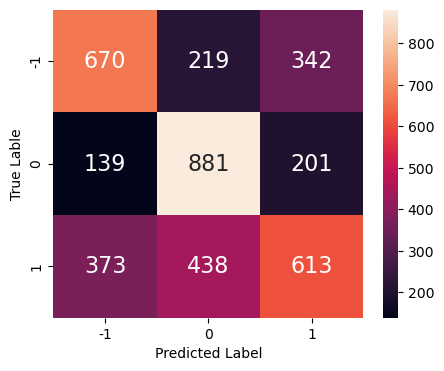

In [619]:
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize=(5,4))
# cm_df = pd.DataFrame(cm, index = ['Negative','Positive'], columns = ['Negative','Positive'])
sn.heatmap(cm, annot=True, fmt='d', annot_kws={'size':16}, xticklabels=label_names, yticklabels=label_names)
plt.xlabel("Predicted Label"); plt.ylabel('True Lable');

# ----------------------------GLOVE XGboost---------------------

In [620]:
train_data_XGboost = train_data.copy()

In [621]:
train_data_XGboost

Text  Sentiment  \
0      RT @RobertBeadles: Yo💥\nEnter to WIN 1,000 Mon...        1.0   
1      Net issuance increases to fund fiscal programs...        1.0   
2      RT @bentboolean: How much of Amazon's traffic ...        1.0   
3      $863.69 Million in Sales Expected for Spirit A...        1.0   
4      RT @ArjunKharpal: #Apple has cut the prices of...       -1.0   
...                                                  ...        ...   
15500  rt pleas awar scam activ use name give away et...       -1.0   
15501         rt crypto alright fuck anim sold btc break       -1.0   
15502  twtr mgm mgm resort suffer backlash su shoot v...       -1.0   
15503  rt vote result import peopl call stupid peopl ...       -1.0   
15504                              kill witch l domo via       -1.0   

                                              clean_text  \
0      rt robertbeadles yo enter to win monarch token...   
1      net issuance increases to fund fiscal programs...   
2      rt bentboolean how much of amazon traffic is s...   
3      million in sales expected for spirit aerosyste...   
4      rt arjunkharpal apple has cut the prices of th...   
...                                                  ...   
15500  rt pleas awar scam activ use name give away et...   
15501         rt crypto alright fuck anim sold btc break   
15502  twtr mgm mgm resort suffer backlash su shoot v...   
15503  rt vote result import peopl call stupid peopl ...   
15504                                kill witch domo via   

                                                  tokens  
0      ['robertbeadles', 'yo', 'enter', 'win', 'monar...  
1      ['net', 'issuance', 'increases', 'fund', 'fisc...  
2      ['bentboolean', 'much', 'amazon', 'traffic', '...  
3      ['million', 'sales', 'expected', 'spirit', 'ae...  
4      ['arjunkharpal', 'apple', 'cut', 'prices', 'ip...  
...                                                  ...  
15500  ['pleas', 'awar', 'scam', 'activ', 'use', 'nam...  
15501  ['crypto', 'alright', 'fuck', 'anim', 'sold', ...  
15502  ['twtr', 'mgm', 'mgm', 'resort', 'suffer', 'ba...  
15503  ['vote', 'result', 'import', 'peopl', 'call', ...  
15504                   ['kill', 'witch', 'domo', 'via']  

[15505 rows x 4 columns]

In [622]:
train_data_XGboost['Sentiment'] = train_data_XGboost['Sentiment'].replace(1, 2)
train_data_XGboost['Sentiment'] = train_data_XGboost['Sentiment'].replace(0, 1)
train_data_XGboost['Sentiment'] = train_data_XGboost['Sentiment'].replace(-1, 0)

In [623]:
test_data_XGboost = test_data.copy()

In [624]:
test_data_XGboost['Sentiment'] = test_data_XGboost['Sentiment'].replace(1, 2)

In [625]:
test_data_XGboost['Sentiment'] = test_data_XGboost['Sentiment'].replace(0, 1)

In [626]:
test_data_XGboost['Sentiment'] = test_data_XGboost['Sentiment'].replace(-1, 0)

In [635]:
test_data_XGboost

Text  Sentiment  \
0     #SriLanka surcharge on fuel removed!\n⛽📉\nThe ...        0.0   
1     $AMD Ryzen 4000 desktop CPUs looking ‘great’ a...        2.0   
2     RT @QuantTrend: Reduce your portfolio RISK! GO...        2.0   
3     Where to Look for Dependable Dividends\nRead M...        1.0   
4     How will the future fly for Spirit Air $SAVE ?...        1.0   
...                                                 ...        ...   
3871                   vz move motley fool messag board        0.0   
3872           trade low fee binanc regist bonu brx gup        0.0   
3873  rt bit mind blow say least lol stock market ca...        0.0   
3874  day ago btc ran amp alt fire week bitcoin jump...        0.0   
3875                          fake event aapl timestamp        0.0   

                                             clean_text  \
0     srilanka surcharge on fuel removed the surchar...   
1     amd ryzen desktop cpus looking great and on tr...   
2     rt quanttrend reduce your portfolio risk gold ...   
3     where to look for dependable dividends read mo...   
4     how will the future fly for spirit air save bl...   
...                                                 ...   
3871                   vz move motley fool messag board   
3872           trade low fee binanc regist bonu brx gup   
3873  rt bit mind blow say least lol stock market ca...   
3874  day ago btc ran amp alt fire week bitcoin jump...   
3875                          fake event aapl timestamp   

                                                 tokens  
0     ['srilanka', 'surcharge', 'fuel', 'removed', '...  
1     ['amd', 'ryzen', 'desktop', 'cpus', 'looking',...  
2     ['quanttrend', 'reduce', 'portfolio', 'risk', ...  
3     ['look', 'dependable', 'dividends', 'read', 'g...  
4     ['future', 'fly', 'spirit', 'air', 'save', 'bl...  
...                                                 ...  
3871  ['vz', 'move', 'motley', 'fool', 'messag', 'bo...  
3872  ['trade', 'low', 'fee', 'binanc', 'regist', 'b...  
3873  ['bit', 'mind', 'blow', 'say', 'least', 'lol',...  
3874  ['day', 'ago', 'btc', 'ran', 'amp', 'alt', 'fi...  
3875             ['fake', 'event', 'aapl', 'timestamp']  

[3876 rows x 4 columns]

In [627]:
from xgboost import XGBClassifier
glove_xgboost_model = XGBClassifier()
glove_xgboost_model.fit(X=train_glove_vectors,y=train_data_XGboost['Sentiment'])

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [639]:
test_glove_vectors = generate_glove_vectors(test_data_XGboost['tokens'], model=glove_vectors_model)
test_svd_xgboost_predicted_classes = glove_xgboost_model.predict(test_glove_vectors)

In [640]:
from sklearn.metrics import classification_report
print(classification_report(test_data_XGboost['Sentiment'], test_svd_xgboost_predicted_classes))

              precision    recall  f1-score   support

         0.0       0.74      0.70      0.72      1231
         1.0       0.82      0.89      0.85      1221
         2.0       0.73      0.71      0.72      1424

    accuracy                           0.76      3876
   macro avg       0.76      0.77      0.76      3876
weighted avg       0.76      0.76      0.76      3876



In [641]:
from sklearn.model_selection import train_test_split, cross_val_score

In [642]:
scores = cross_val_score(glove_xgboost_model, train_glove_vectors, train_data_XGboost['Sentiment'], cv=10)
print("Accuracy scores:", scores)
print("Mean accuracy:", scores.mean())

Accuracy scores: [0.43713733 0.65892972 0.65699549 0.62088975 0.7382334  0.73548387
 0.84645161 0.86580645 0.87419355 0.83612903]
Mean accuracy: 0.7270250202782804


In [649]:
from sklearn import metrics
from tqdm import tqdm

y_true = test_data_XGboost['Sentiment']
probabilities = glove_xgboost_model.predict_proba(test_glove_vectors)
# Get the predicted labels
y_pred = test_svd_xgboost_predicted_classes
# Calculate the accuracy
accuracy = metrics.accuracy_score(y_true, test_svd_xgboost_predicted_classes)
# Calculate the precision
precision = metrics.precision_score(y_true, y_pred, average='weighted')
# Calculate the recall
recall = metrics.recall_score(y_true, y_pred,average='weighted')
# Calculate the F1 score
f1 = metrics.f1_score(y_true, y_pred,average='weighted')
auc=metrics.roc_auc_score(y_true, probabilities, multi_class='ovo', average='weighted')
cm = metrics.confusion_matrix(y_true,y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)
print('AUC score:', auc)
print('Confusion Matrix', cm)

Accuracy: 0.7636738906088751
Precision: 0.7612687237162498
Recall: 0.7636738906088751
F1 score: 0.7616803856225217
AUC score: 0.9082464681958655
Confusion Matrix [[ 856   89  286]
 [  44 1092   85]
 [ 259  153 1012]]


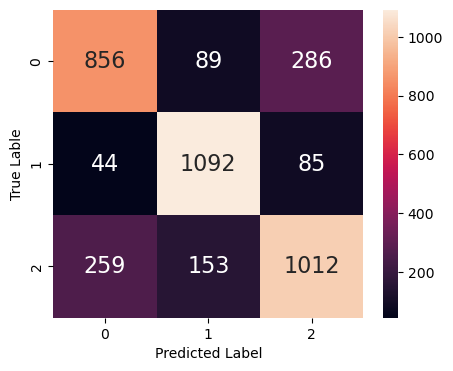

In [650]:
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize=(5,4))
# cm_df = pd.DataFrame(cm, index = ['Negative','Positive'], columns = ['Negative','Positive'])
sn.heatmap(cm, annot=True, fmt='d', annot_kws={'size':16}, xticklabels=label_names, yticklabels=label_names)
plt.xlabel("Predicted Label"); plt.ylabel('True Lable');

This model worked better than other pre-trained models. It has pretty good results, yet - Regular Trained LogisticRegression shoved the best results on our data.

So, the model that is chosen for predictions is - LogisticRegression